# pedestals_subtracted

Files that contain less than 84 rows:
163606_2015-09-19T12_02_38_2015-09-19T13_02_46_pedestal_sub_run_dump.csv
198150_2017-08-30T09_38_42_2017-08-30T10_34_20_pedestal_sub_run_dump.csv
198152_2017-08-30T11_00_50_2017-08-30T12_00_54_pedestal_sub_run_dump.csv
198154_2017-08-30T12_00_56_2017-08-30T13_01_05_pedestal_sub_run_dump.csv
198155_2017-08-30T13_01_07_2017-08-30T13_33_19_pedestal_sub_run_dump.csv
198156_2017-08-30T13_33_21_2017-08-30T14_11_55_pedestal_sub_run_dump.csv
198158_2017-08-30T14_11_57_2017-08-30T15_12_06_pedestal_sub_run_dump.csv
198163_2017-08-30T16_11_38_2017-08-30T17_11_46_pedestal_sub_run_dump.csv
198164_2017-08-30T17_11_49_2017-08-30T18_11_57_pedestal_sub_run_dump.csv
198165_2017-08-30T18_11_59_2017-08-30T19_12_07_pedestal_sub_run_dump.csv
198244_2017-08-31T15_30_40_2017-08-31T16_11_28_pedestal_sub_run_dump.csv
198245_2017-08-31T16_11_30_2017-08-31T17_11_36_pedestal_sub_run_dump.csv
198247_2017-08-31T17_26_27_2017-08-31T18_12_37_pedestal_sub_run_dump.csv
198285_2017-09-01T02_40_37_2017-09-01T03_19_59_pedestal_sub_run_dump.csv
198299_2017-09-01T06_06_45_2017-09-01T07_06_51_pedestal_sub_run_dump.csv
198300_2017-09-01T07_06_53_2017-09-01T08_07_02_pedestal_sub_run_dump.csv
198301_2017-09-01T08_07_04_2017-09-01T09_07_12_pedestal_sub_run_dump.csv
198304_2017-09-01T09_07_14_2017-09-01T09_44_14_pedestal_sub_run_dump.csv
198307_2017-09-01T09_44_16_2017-09-01T10_44_23_pedestal_sub_run_dump.csv
198308_2017-09-01T10_44_25_2017-09-01T11_38_19_pedestal_sub_run_dump.csv
198311_2017-09-01T12_32_32_2017-09-01T13_32_34_pedestal_sub_run_dump.csv
198312_2017-09-01T13_32_36_2017-09-01T14_08_40_pedestal_sub_run_dump.csv
200495_2017-10-14T02_59_11_2017-10-14T03_59_17_pedestal_sub_run_dump.csv
200496_2017-10-14T03_59_19_2017-10-14T04_59_28_pedestal_sub_run_dump.csv
200497_2017-10-14T04_59_30_2017-10-14T05_59_38_pedestal_sub_run_dump.csv
200498_2017-10-14T05_59_40_2017-10-14T06_59_49_pedestal_sub_run_dump.csv
200500_2017-10-14T07_01_37_2017-10-14T08_01_39_pedestal_sub_run_dump.csv
200501_2017-10-14T08_01_41_2017-10-14T09_01_49_pedestal_sub_run_dump.csv
200502_2017-10-14T09_01_51_2017-10-14T10_02_00_pedestal_sub_run_dump.csv
200503_2017-10-14T10_02_02_2017-10-14T11_02_10_pedestal_sub_run_dump.csv
201287_2017-10-27T06_56_52_2017-10-27T07_56_54_pedestal_sub_run_dump.csv
201289_2017-10-27T07_56_56_2017-10-27T08_57_04_pedestal_sub_run_dump.csv
201294_2017-10-27T09_57_17_2017-10-27T10_57_25_pedestal_sub_run_dump.csv
201295_2017-10-27T10_57_27_2017-10-27T11_57_35_pedestal_sub_run_dump.csv
209007_2018-05-23T02_51_55_2018-05-23T03_52_08_pedestal_sub_run_dump.csv

In [102]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import os

files_raw = glob.glob("D:/Praca Magisterska/nowe/pedestals_subtracted/2018/*.csv")
files_calib = glob.glob("D:/Praca Magisterska/nowe/Tell1CalibCsv/*.csv")

means = []
means_abs = []
stddevs = []
timestamps = []
for file in files_raw:
    data = pd.read_csv(file ,sep=' ', header=None, usecols=range(4,2053))
    timestamp = datetime.datetime.strptime(data.iloc[0][4], '%Y-%m-%dT%H:%M:%S')
    timestamps.append(timestamp)
    del data[4]
    mean = data.mean().mean()
    mean_abs = data.abs().mean().mean()
    stddev = data.stack().std()
    means.append(mean)
    means_abs.append(mean_abs)
    stddevs.append(stddev)

calib_timestamps = []
for file in files_calib:
    file_name = os.path.basename(file)
    file_name_timestamp = datetime.datetime.strptime(file_name, '%Y_%m_%d-%H_%M_%S.csv')
    if (file_name_timestamp > min(timestamps)) and (file_name_timestamp < max(timestamps)):
        calib_timestamps.append(file_name_timestamp)

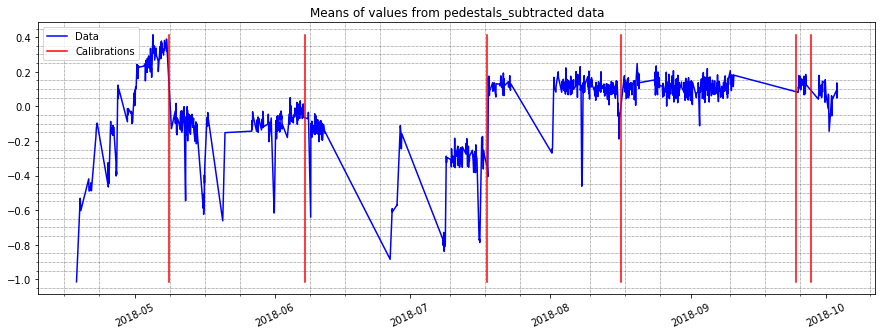

In [103]:
fig, ax = plt.subplots()
ax.set_title('Means of values from pedestals_subtracted data')
ax.plot(timestamps, means, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means),max(means)], 'r', label='Calibrations')
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

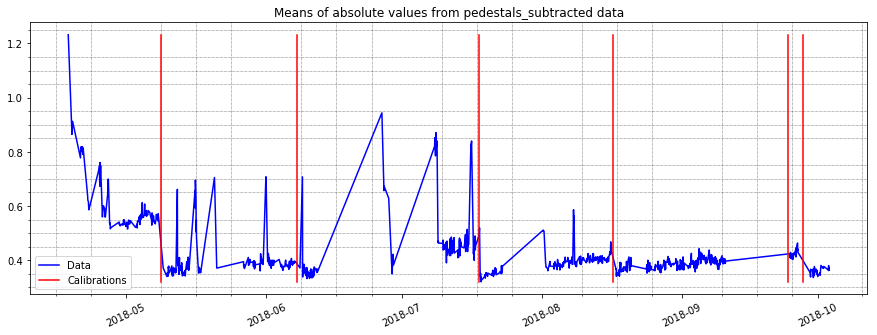

In [104]:
fig, ax = plt.subplots()
ax.set_title('Means of absolute values from pedestals_subtracted data')
ax.plot(timestamps, means_abs, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means_abs),max(means_abs)], 'r', label='Calibrations')
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

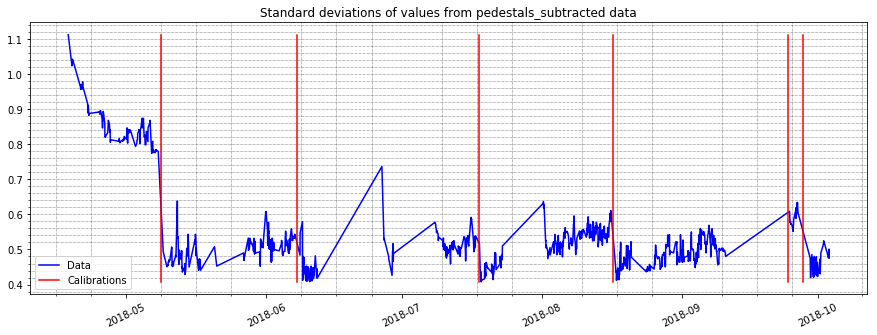

In [105]:
fig, ax = plt.subplots()
ax.set_title('Standard deviations of values from pedestals_subtracted data')
ax.plot(timestamps, stddevs, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(stddevs),max(stddevs)], 'r', label='Calibrations')
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

Weighted moving average:

In [126]:
number_of_elements = 10
moving_average = []
for index in range(len(means_abs)):
    elements = []
    for i in range(number_of_elements,0,-1):
        elements.append(means_abs[index-i])
        
    if index < 10:
        moving_average.append(means_abs[index])
    else:
        average = np.average(elements, weights=range(1,number_of_elements+1))
        moving_average.append(average)
        
calib_timestamp_index = 0
counter = 0
for index in range(len(means_abs)):
    if calib_timestamp_index >= len(calib_timestamps):
        break
    if timestamps[index] > calib_timestamps[calib_timestamp_index]:
        for i in range(0,number_of_elements):
            moving_average[index+1] = means_abs[index+i]
        calib_timestamp_index = calib_timestamp_index + 1
    

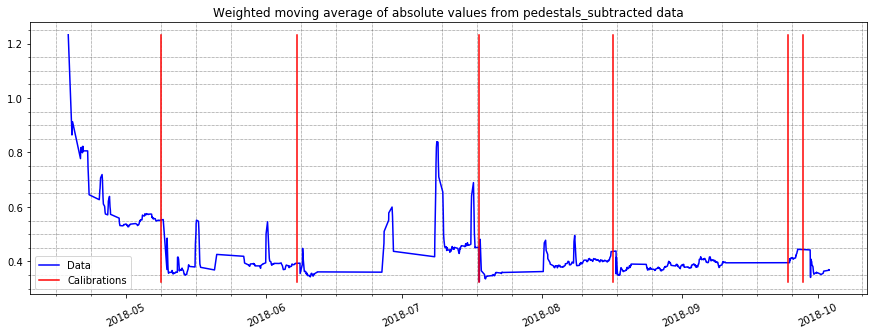

In [127]:
fig, ax = plt.subplots()
ax.set_title('Weighted moving average of absolute values from pedestals_subtracted data')
ax.plot(timestamps, moving_average, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(moving_average),max(moving_average)], 'r', label='Calibrations')
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

# Noise:

In [108]:
files_raw = glob.glob("D:/Praca Magisterska/nowe/noise/2018/*.csv")

means_noise = []
timestamps_noise = []
for file in files_raw:
    data = pd.read_csv(file ,sep=' ', header=None, usecols=range(4,2053))
    timestamp = datetime.datetime.strptime(data.iloc[0][4], '%Y-%m-%dT%H:%M:%S')
    timestamps_noise.append(timestamp)
    del data[4]
    mean = data.mean().mean()
    means_noise.append(mean)

In [109]:
calib_timestamps = []
for file in files_calib:
    file_name = os.path.basename(file)
    file_name_timestamp = datetime.datetime.strptime(file_name, '%Y_%m_%d-%H_%M_%S.csv')
    if (file_name_timestamp > min(timestamps_noise)) and (file_name_timestamp < max(timestamps_noise)):
        calib_timestamps.append(file_name_timestamp)

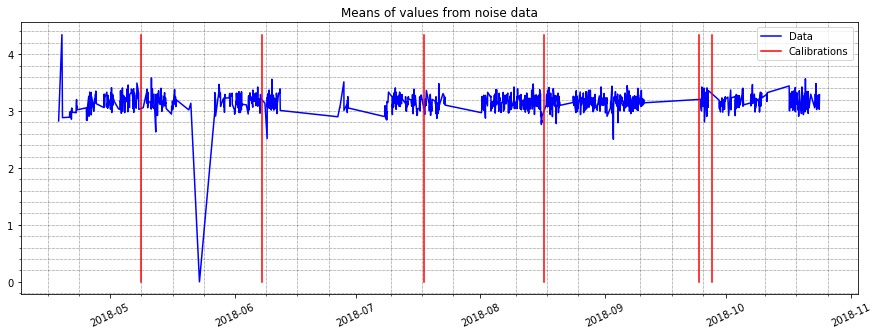

In [110]:
fig, ax = plt.subplots()
ax.set_title('Means of values from noise data')
ax.plot(timestamps_noise, means_noise, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means_noise),max(means_noise)], 'r', label='Calibrations')
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

File '208363_2018-05-16T10_17_51_2018-05-16T10_49_01_noise_run_dump.csv' contains only 0.00 values.
Noise level is constant.